In [21]:
import os
os.listdir('../../data/detection/')

['009573.jpg',
 '2008_007442.jpg',
 '2008_007442.npy',
 '2010_005061.jpg',
 '2010_005061.npy',
 '2011_000538.jpg']

In [31]:
import numpy as np
arr=np.array([[166.0, 57.0, 205.0, 165.0], [165.0, 265.0, 200.0, 373.0], [148.0, 104.0, 171.0, 118.0], [146.0, 312.0, 169.0, 324.0]])
np.save('../../data/detection/2008_007442',arr)

arr=np.array([[401.0, 240.0, 443.0, 299.0], [401.0, 190.0, 435.0, 249.0], [399.0, 185.0, 448.0, 218.0], [394.0, 99.0, 433.0, 163.0]])
np.save('../../data/detection/2010_005061',arr)

arr=np.array([[113.0, 267.0, 275.0, 428.0], [126.0, 183.0, 265.0, 335.0], [83.0, 251.0, 160.0, 292.0], [92.0, 332.0, 201.0, 390.0]])
np.save('../../data/detection/2011_000538',arr)

## 样例数据加载

In [1]:
from skimage import io
import numpy as np
from PIL import Image
import boxes_utils
image_name='2011_000538'
image = io.imread('../../data/detection/{}.jpg'.format(image_name))
boxes = np.load('../../data/detection/{}.npy'.format(image_name))

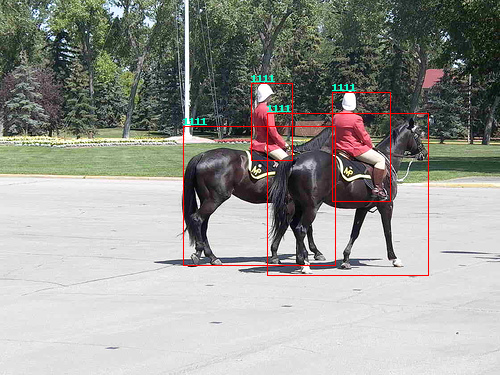

In [2]:
boxes_utils.draw_boxes(Image.fromarray(image),boxes,class_names=['1111']*4)

# 数据增广

In [3]:
from torchvision.transforms import transforms
class ColorJitter(object):
    def __init__(self, brightness=0, contrast=0, saturation=0, hue=0):
        self.trans = transforms.ColorJitter(brightness, contrast, saturation, hue)

    def __call__(self, image, boxes=None, labels=None):
        return self.trans(image), boxes, labels

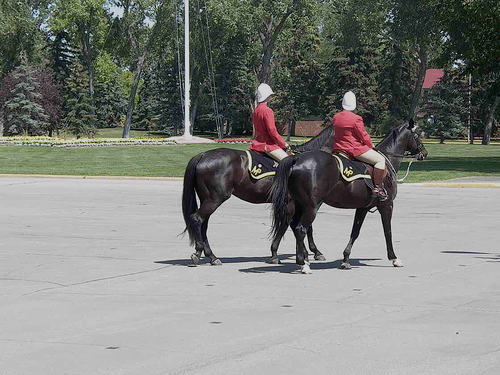

In [4]:
im,_,_ = ColorJitter(brightness=0.3)(Image.fromarray(image))
im

## Resize


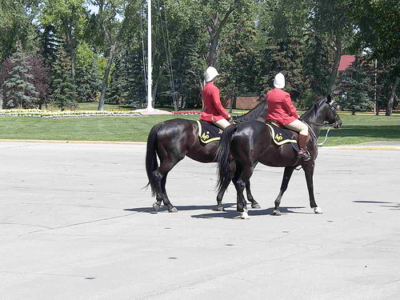

In [5]:
from data_augment import Resize

im,bb,_ = Resize(size=300)(Image.fromarray(image),boxes)
im

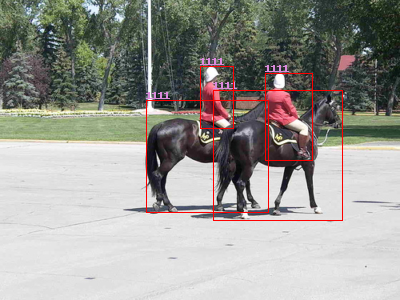

In [7]:
boxes_utils.draw_boxes(im,bb,class_names=['1111']*4)

## Pad

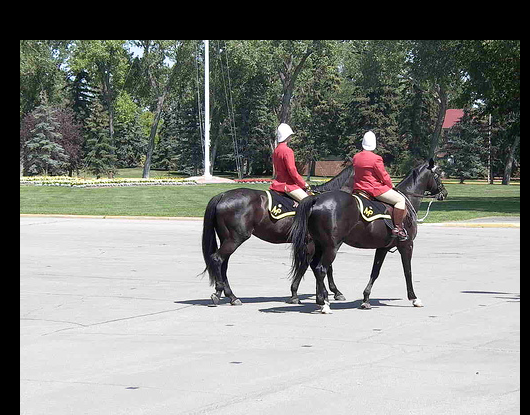

In [7]:
from data_augment import Pad
im,bb,_ = Pad(padding=(20,40,10,0))(Image.fromarray(image),boxes)
im

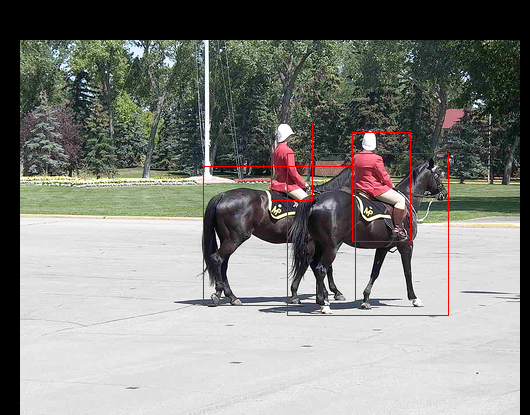

In [8]:
boxes_utils.draw_boxes(im,bb)